In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 
import re

In [ ]:
tokenizer = Tokenizer()
text = open('/content/wil1.txt','rb').read().decode(encoding = 'utf-8')

text = re.sub('([0-9]+)','',text)
text = text.replace("www.PoemHunter.com - The World's Poetry Archive","")
text = text.replace("William Wordsworth","")
text = text.strip()
text = text.lower()
list_void = ["--",'.','/','<','>', '{','£','Æ','Ñ','Õ','á','æ','è','ë','í','ö','\x0c','\r','\t']
for s in list_void:
  text = text.replace(s,"")

In [ ]:
corpus = text.split('\n')

corpus = corpus[:2000]

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [ ]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_sequences.append(n_gram_seq)   

In [ ]:
max_seq_len = max([len(t) for t in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences, padding='pre',maxlen=max_seq_len))

predictors, label = input_sequences[:,:-1], input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
model = Sequential([
             Embedding(total_words,100, input_length=max_seq_len-1),
             Bidirectional(LSTM(256, return_sequences=True)),
             Dropout(0.2),
             LSTM(100),
             Dense(total_words, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)),
             Dense(total_words/2, activation = 'relu'),
             Dense(total_words, activation='softmax')                       
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['acc'])
print(model.summary)

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fe8f48b2a58>>


In [ ]:
history = model.fit(predictors, label, epochs=50, verbose=1)

Epoch 1/50
327/327 [==============================] - 22s 68ms/step - loss: 7.7150 - acc: 0.0560
Epoch 2/50
327/327 [==============================] - 22s 68ms/step - loss: 6.9230 - acc: 0.0621
Epoch 3/50
327/327 [==============================] - 22s 68ms/step - loss: 6.7614 - acc: 0.0621
Epoch 4/50
327/327 [==============================] - 22s 68ms/step - loss: 6.6004 - acc: 0.0629
Epoch 5/50
327/327 [==============================] - 22s 68ms/step - loss: 6.4262 - acc: 0.0636
Epoch 6/50
327/327 [==============================] - 22s 68ms/step - loss: 6.3022 - acc: 0.0633
Epoch 7/50
327/327 [==============================] - 22s 68ms/step - loss: 6.2005 - acc: 0.0637
Epoch 8/50
327/327 [==============================] - 22s 68ms/step - loss: 6.0941 - acc: 0.0725
Epoch 9/50
327/327 [==============================] - 22s 68ms/step - loss: 5.9937 - acc: 0.0753
Epoch 10/50
327/327 [==============================] - 22s 69ms/step - loss: 5.8943 - acc: 0.0815
Epoch 11/50
327/327 [========

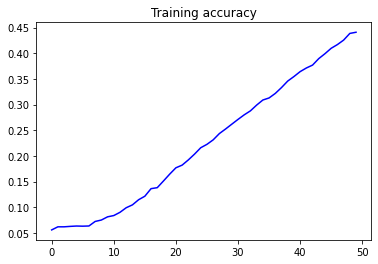

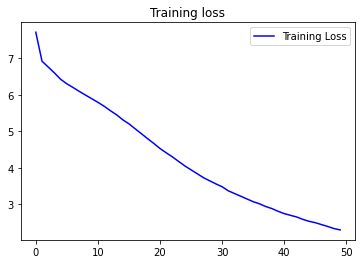

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Girl so beautiful"
next_words = 10

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Girl so beautiful known foul are primroses the steep tread and years beguiled
